In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from itertools import islice

## Check:
 issue, labeled_sen_url

 index_col

 do pagerank or not

In [ ]:
# issue

# 首字大寫
# TODO
issue = 'Drug Legalization'#'Vaccine' #'Death Penalty' #  'Abortion'# 'LGBT'  #'Immigrant'# 'Gun control' #'Wealth tax' #
find = issue + '/df_' + issue.lower()
find

'Drug Legalization/df_drug legalization'

In [ ]:
# path

# the 30 tweets google sheet # 直接用url
# TODO

# labeled_sen_url = 'https://docs.google.com/spreadsheets/d/1Zc7vN-9SOFl0gmk9CYq9zOeozgkUgAv-BcwyMqcsW4o/edit#gid=0' # abortion
# labeled_sen_url = 'https://docs.google.com/spreadsheets/d/1JGNnX0FVF5WbfgFX-OBOrHr1G2tIjIw-0BCkA1nH02s/edit#gid=1536581023' # death
# labeled_sen_url = 'https://docs.google.com/spreadsheets/d/14ajAoGBgWybz0l5c5v6mh8YdPs3I1k1g2DWjTR8Kayk/edit#gid=1536581023'  #gun
# labeled_sen_url = 'https://docs.google.com/spreadsheets/d/1xG3oWKShki-lDaJQnp2d1zSnrw6sIqNDsk24vW_bE2c/edit#gid=0'  # immigrant
# labeled_sen_url = 'https://docs.google.com/spreadsheets/d/1bnBDX_Krh2SKzZvqISldrAE07wGdZygoxxn827TvLYo/edit#gid=0'  # LGBT
# labeled_sen_url = 'https://docs.google.com/spreadsheets/d/1DlPnD9FZA18JECGnje0TAXTbMu3kGOFxD8Y-zbh57-I/edit#gid=0'   # vaccine
# labeled_sen_url = 'https://docs.google.com/spreadsheets/d/1AZu_8JDgJtzYwqChy7ICL-ITpO6d9X9JVbxkBLxXiNY/edit#gid=0'   # tax
labeled_sen_url = 'https://docs.google.com/spreadsheets/d/1fchGt1JDtkGd8IWkG7PWXpuxBSIIGsHi3KgH1-MFPPM/edit#gid=0'  #drug

# follower followee relationship to build the graph
path = '/content/drive/MyDrive/SMA project/Data/'+ find + '_followee_followers.xlsx'

# senator username & id
id_path = '/content/drive/MyDrive/SMA project/Data/'+ find + '_senators.xlsx'

In [ ]:
df = pd.read_excel(path, index_col=None)  # index_col=0
# df['followee id'] = df['followee id'].apply(str) 
# df['follower id'] = df['follower id'].apply(str)  
df.head()

Unnamed: 0  follower id  followee id
0           0   1074480192    968650362
1           1   1074480192    278145569
2           2   1074480192    619215615
3           3   1074480192     19010788
4           4   1074480192    144033709

In [ ]:
id_set = set(df['follower id']) 
id_count = len(id_set)
print(id_count)

1839


In [ ]:
followee_id_set = set(df['followee id'])
len(followee_id_set)

1607

In [ ]:
G=nx.from_pandas_edgelist(df, 'follower id', 'followee id', create_using=nx.DiGraph())
# G_copy = G.copy()

## senators id

In [ ]:
url = labeled_sen_url.replace('/edit#gid=', '/export?format=csv&gid=')
sendf = pd.read_csv(url)

id_df = pd.read_excel(id_path, index_col=None, header=None)
id_df.columns = ['username', 'id'] 
id_df.head()

username          id
0     SenTedCruz  1074480192
1  SenWhitehouse   242555999
2   SenRickScott   131546062
3      SenWarren   970207298
4  BernieSanders   216776631

In [ ]:
sendf.head()

tweet id       username  bias              topic  retweet(參考用)  \
0  1516627969975984130  BernieSanders     1  drug legalization         50276   
1  1511524109896888324  BernieSanders     1  drug legalization          1318   
2  1516874343233458176  BernieSanders     1  drug legalization          1050   
3  1489701001032613888     SenSchumer     1  drug legalization           382   
4  1528851666962944003     SenSchumer     1  drug legalization           124   

   like(參考用)        發文日期                                                 網址  
0     288372  4/20 12:01  https://twitter.com/BernieSanders/status/15166...  
1       8437   4/6 10:00  https://twitter.com/BernieSanders/status/15115...  
2       4849   4/21 4:20  https://twitter.com/BernieSanders/status/15168...  
3       1626    2/5 4:42  https://twitter.com/SenSchumer/status/14897010...  
4        582   5/24 5:33  https://twitter.com/SenSchumer/status/15288516...

In [ ]:
bias = 'bias' #'立場(1：正；-1：反)'  # 
pos_sen_df = sendf.loc[sendf[bias] == 1]
neg_sen_df = sendf.loc[sendf[bias] == -1]
pos_sen_username = set(pos_sen_df['username'])
neg_sen_username = set(neg_sen_df['username'])
del pos_sen_df
del neg_sen_df

agree = []
disagree = []
sen_dict = {}

for _,val in enumerate(pos_sen_username):
  tempdf = id_df.loc[id_df['username'] == val]
  id = tempdf['id'].tolist()
  if id == [] or (id[0] not in G):
    print("missing: ", val)
  else:
    agree.append(id[0])
    sen_dict[id[0]] = val

for _,val in enumerate(neg_sen_username):
  tempdf = id_df.loc[id_df['username'] == val]
  id = tempdf['id'].tolist()
  if id == [] or (id[0] not in G):
    print("missing: ", val)
  else:
    disagree.append(id[0])
    sen_dict[id[0]] = val
print(sen_dict)

{216776631: 'BernieSanders', 293131808: 'PattyMurray', 250188760: 'RonWyden', 970207298: 'SenWarren', 17494010: 'SenSchumer', 968650362: 'SenTomCotton', 131546062: 'SenRickScott', 278145569: 'MarshaBlackburn', 1074480192: 'SenTedCruz', 242555999: 'SenWhitehouse'}


In [ ]:
agree

[216776631, 293131808, 250188760, 970207298, 17494010]

In [ ]:
disagree

[968650362, 131546062, 278145569, 1074480192, 970207298, 242555999]

## BC

In [ ]:
# avoid small component
for component in list(nx.weakly_connected_components(G)):
  if len(component)<4:
    for node in component:
      G.remove_node(node)

In [ ]:
bet_centrality = nx.betweenness_centrality(G, endpoints = False, normalized = True) 

In [ ]:
# closeness centrality
clo_centrality = nx.closeness_centrality(G)  

In [ ]:
# pr = nx.pagerank(G) #先不跑

In [ ]:
'''bet_centrality or clo_centrality is a dictionary.
sort dictionary to find the highest'''

def high_c_nodes(bet_centrality):
  sort_bc = dict(sorted(bet_centrality.items(), key=lambda item: item[1], reverse = True))

  high_bc = dict(islice(sort_bc.items(), 0, 150))
  high_bc_id = high_bc.keys()

  return list(high_bc_id)

## plot

In [ ]:
'''only label some senators to avoid overlapping....
 radom choose some of them to pop'''
sen_dict_for_label = sen_dict.copy()

import random
for i in range(4):
  sen_dict_for_label.pop( random.choice(agree) , None) 
  sen_dict_for_label.pop( random.choice(disagree) , None)   

print(sen_dict_for_label)
print(sen_dict)

{293131808: 'PattyMurray', 968650362: 'SenTomCotton', 242555999: 'SenWhitehouse'}
{216776631: 'BernieSanders', 293131808: 'PattyMurray', 250188760: 'RonWyden', 970207298: 'SenWarren', 17494010: 'SenSchumer', 968650362: 'SenTomCotton', 131546062: 'SenRickScott', 278145569: 'MarshaBlackburn', 1074480192: 'SenTedCruz', 242555999: 'SenWhitehouse'}


In [ ]:
U =G.to_undirected()

In [ ]:
def plot_G(c = 'bet_centrality'):

  if c == 'bet_centrality':
    centrality = bet_centrality
  elif c == 'clo_centrality':
    centrality = clo_centrality
  # else:
  #   centrality = pr

  # color & size
  color_map = []
  size_map = []
  labels = {}
  high_c_id = high_c_nodes(centrality)
  for node in U:
    if node in agree:
      color_map.append('blue')
      size_map.append(200)
    elif node in disagree:
      color_map.append('red')
      size_map.append(200)
    elif node in high_c_id:
      color_map.append('yellow')
      size_map.append(200)
    else:
      color_map.append('gray')
      size_map.append(5)

  # plot
  fig = plt.figure(frameon=True)
  pos = nx.spring_layout(U, iterations=80, threshold=0.00001)  # , iterations=80, threshold=0.0001 
  # spectral_layout shell_layout(跟spring好像一樣) spring_layout kamada_kawai_layout(超慢 放棄) 

  nx.draw(U, pos, node_color=color_map, node_size = size_map, edge_color = 'lightgray', with_labels=False)
  nx.draw_networkx_labels(U, pos, labels = sen_dict_for_label, font_size=32)  #,font_color='r'
  # plt.figure(figsize=(24,24))
  # plt.rcParams["figure.figsize"] = (60,60)

  plt.title(issue + " " +c, fontdict = {'fontsize' : 64})

  w = 50
  h = 50
  fig.set_size_inches(w,h)
  plt.savefig(issue + "_" + c + '.png', dpi=25, facecolor='white', bbox_inches='tight')
  plt.show()


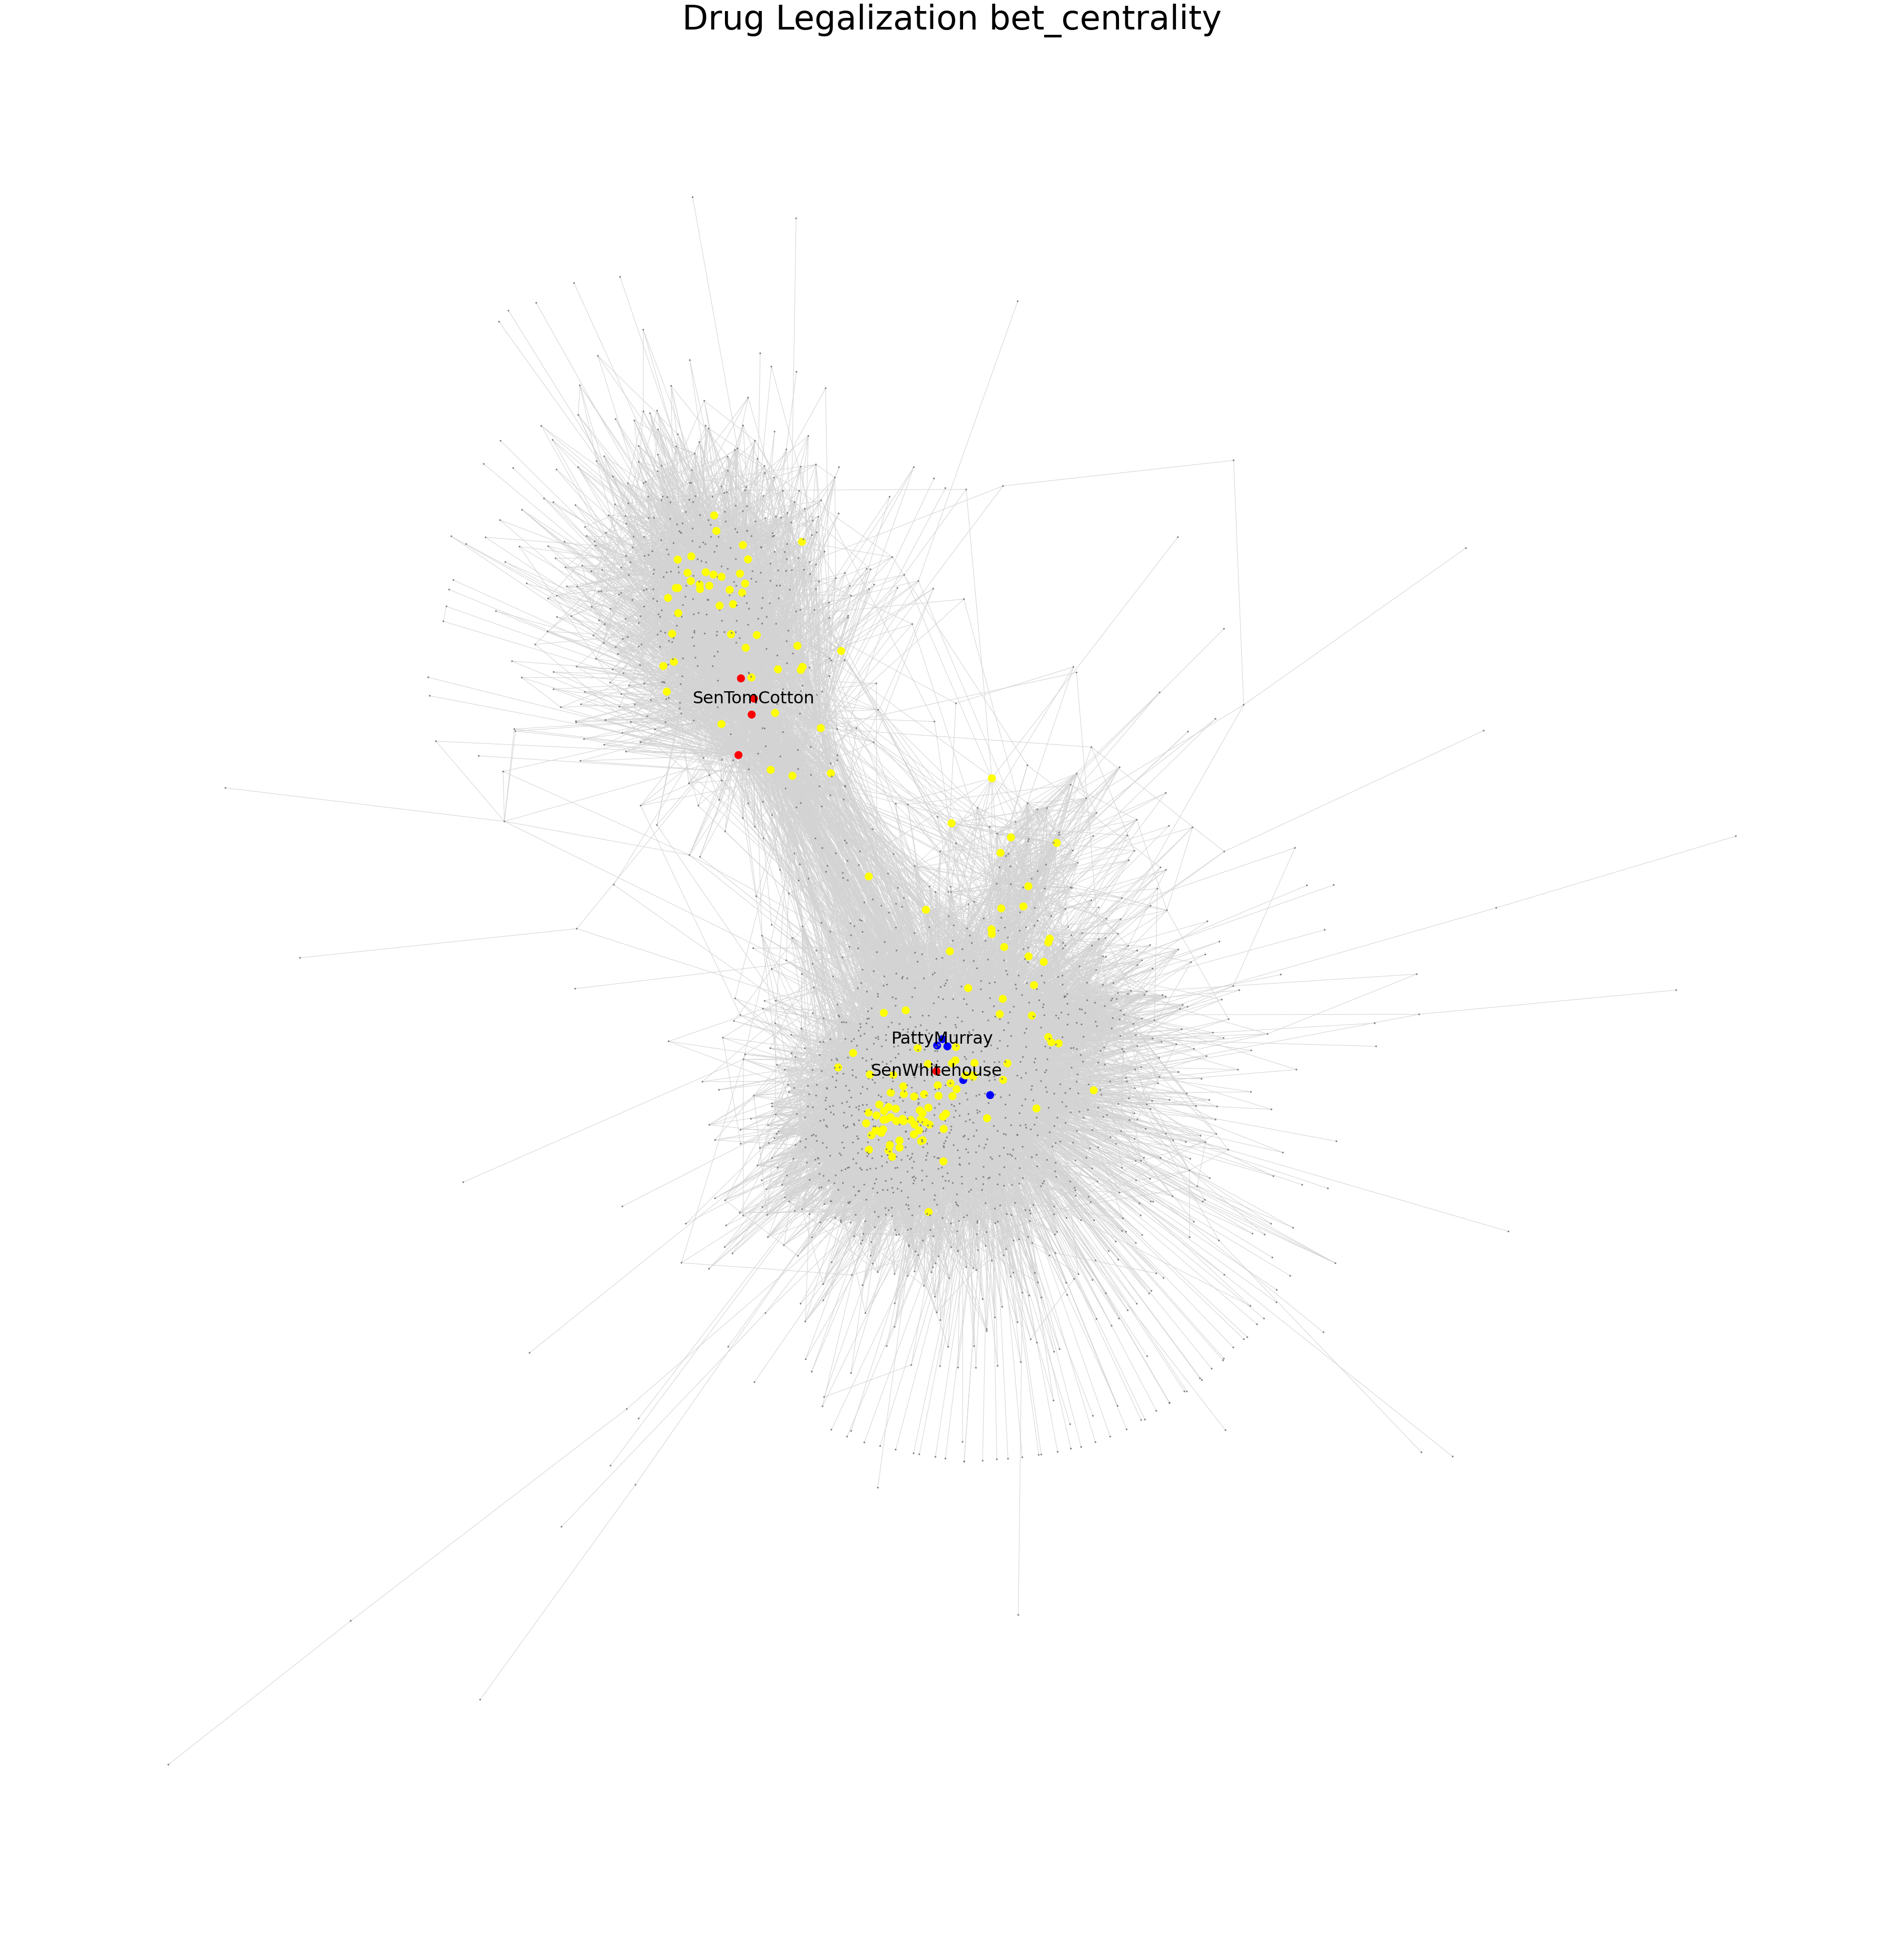

In [ ]:
plot_G('bet_centrality')

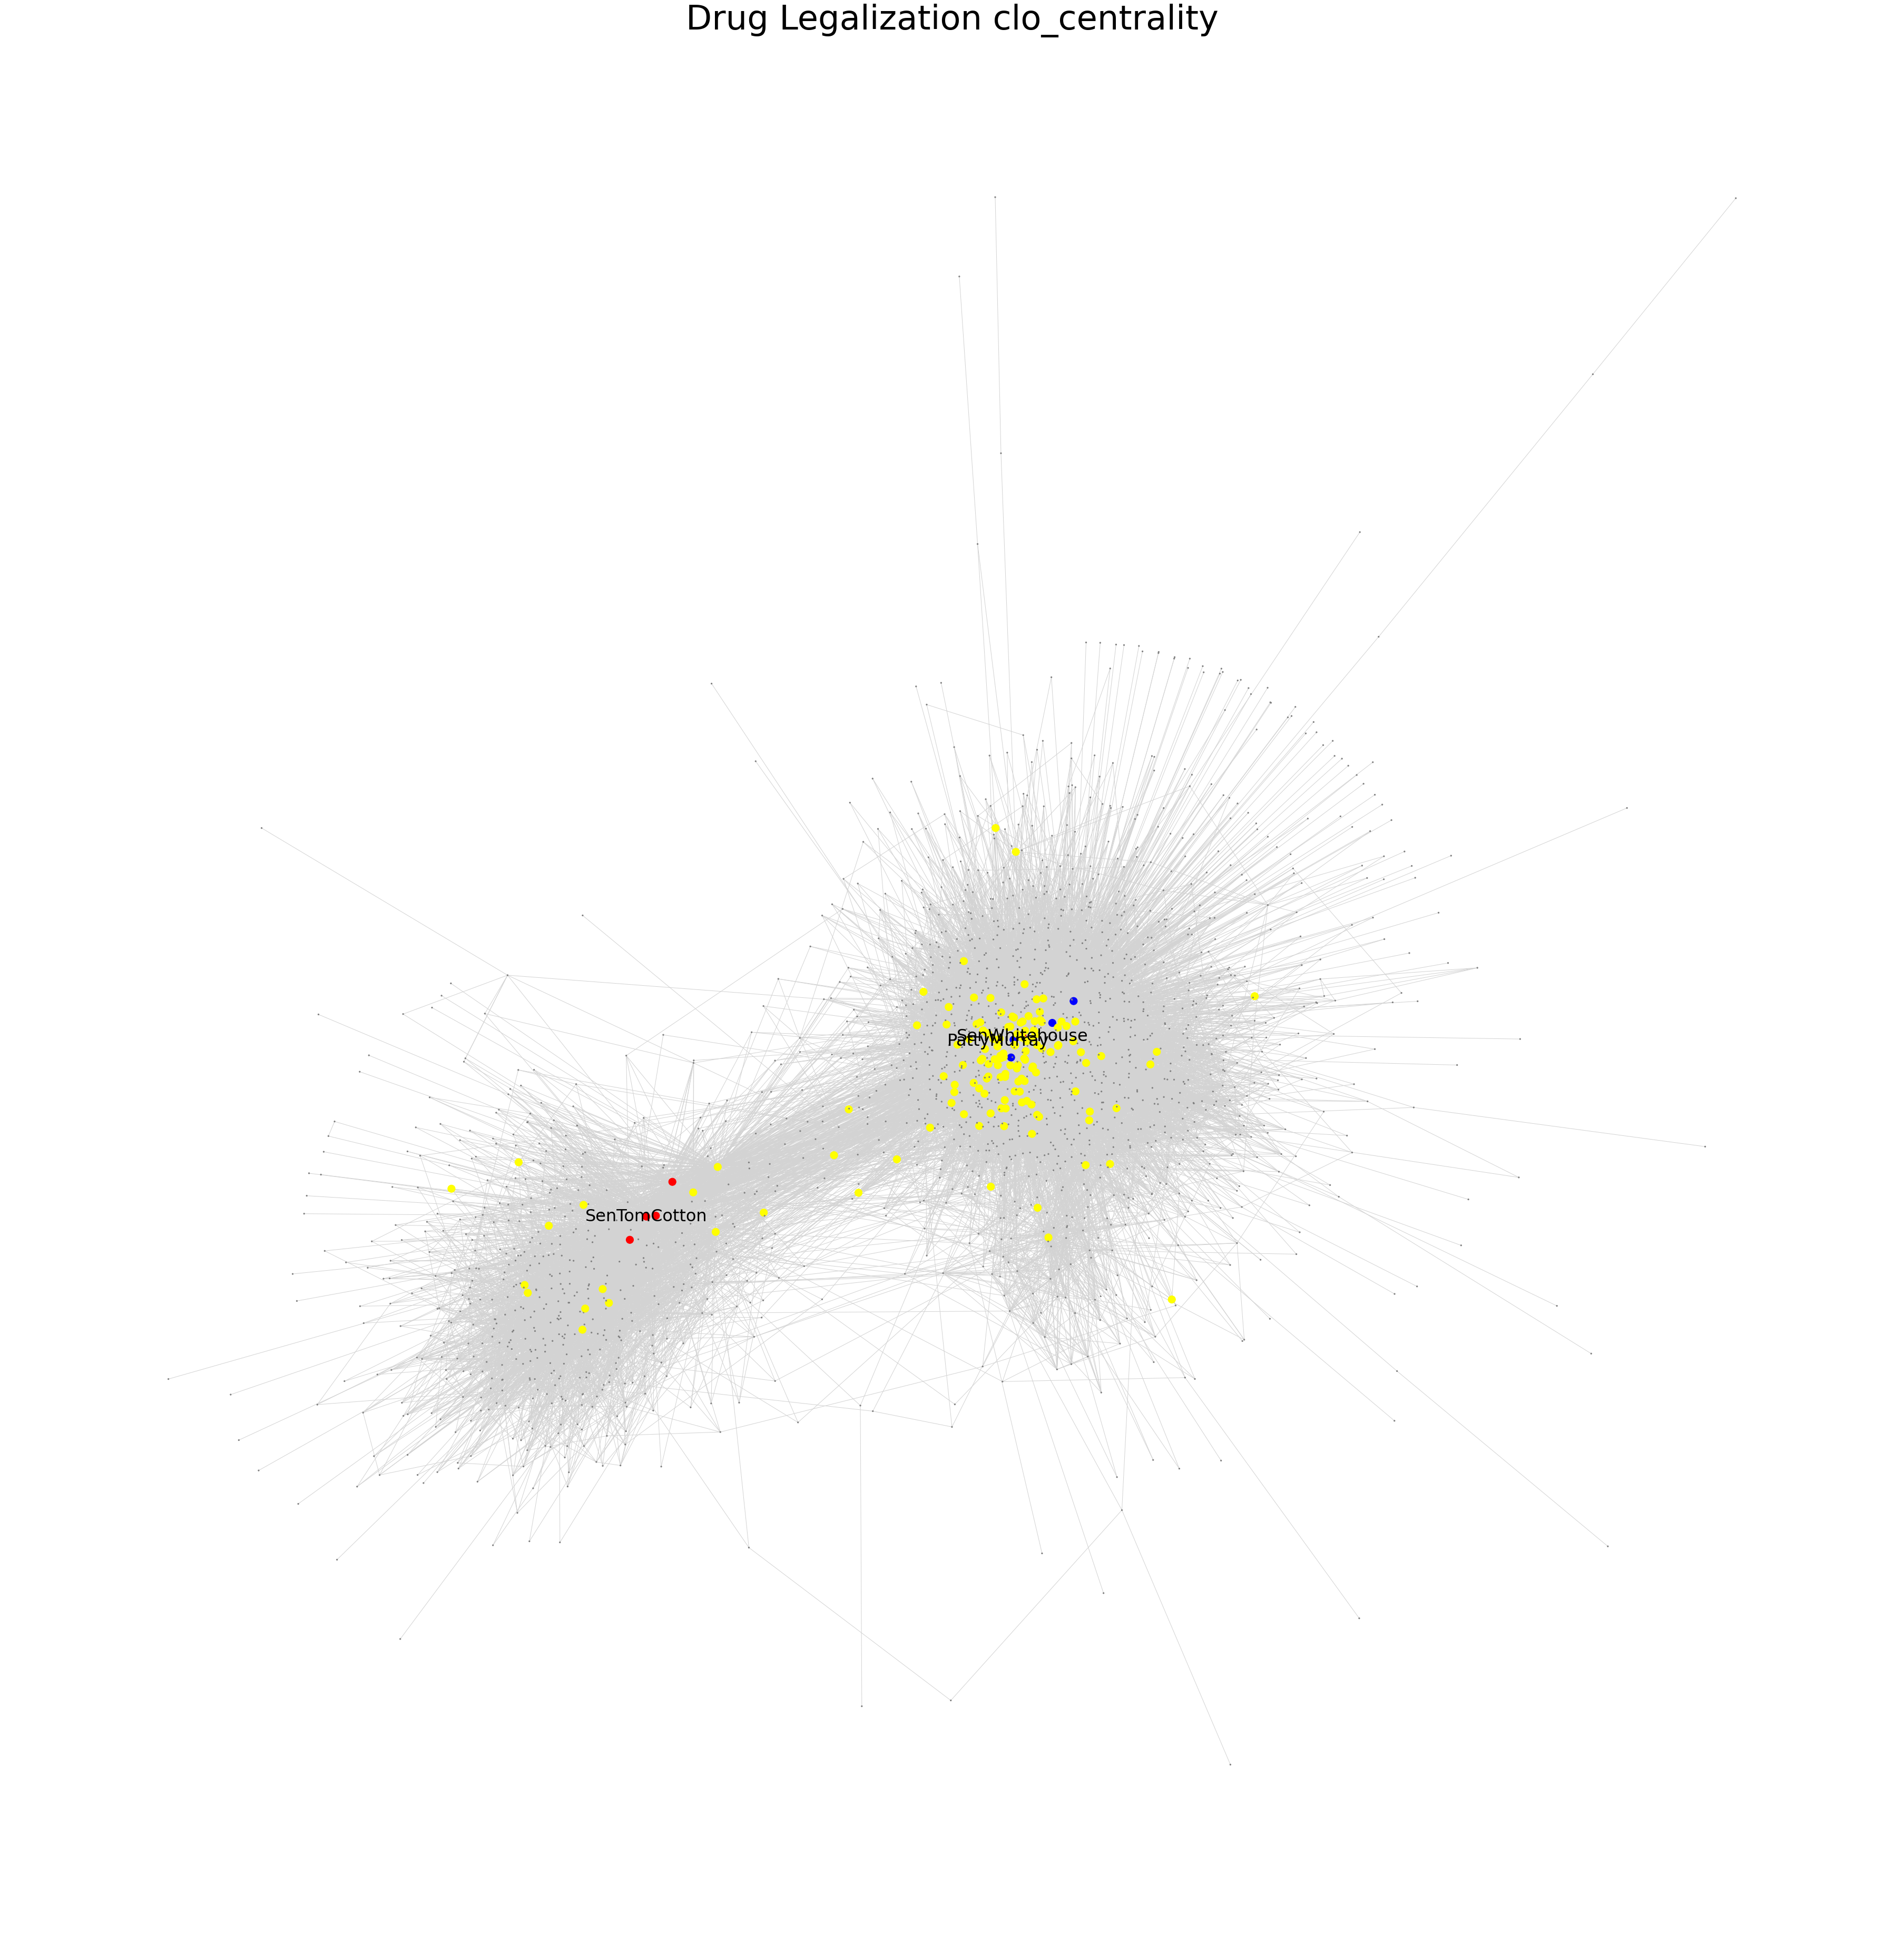

In [ ]:
plot_G('clo_centrality')

In [ ]:
# plot_G('pagerank')

## edge of BC(CC) and senators
save to OL_BCorCC_connection

In [ ]:
from google.colab import auth
auth.authenticate_user()
import gspread

from google.auth import default
creds, _ = default()
gc = gspread.authorize(creds)

sheet = gc.open_by_key('1k9izjr0gt0bbLi1ccXb0Mi3FTXk5_EKzK2uTkATmMHA')
# ws = sheet.add_worksheet(title=issue, rows=100, cols=20)
ws = sheet.worksheet(issue) # if worksheet already exists

cell_list = ws.range('A1:C15')
# cell_list[1].value = 'bc'
# cell_list[2].value = 'cc'

In [ ]:
'''remove senators from bc(cc)'''
high_bc_id_new = []
high_cc_id_new = []
high_bc_nodes = high_c_nodes(bet_centrality)
high_cc_nodes = high_c_nodes(clo_centrality)
for x in high_bc_nodes:
  if x in agree or x in disagree:
    pass
  else:
    high_bc_id_new.append(x)
print("total bc: ",len(high_bc_id_new))

for x in high_cc_nodes:
  if x in agree or x in disagree:
    pass
  else:
    high_cc_id_new.append(x)
print("total cc: ",len(high_cc_id_new))

cell_list[3].value = 'total'
cell_list[4].value = len(high_bc_id_new)
cell_list[5].value = len(high_cc_id_new)

start = 6

print("\n")
for id, name in sen_dict.items():
  count_bc = 0
  count_cc = 0
  for bc_id in high_bc_id_new:
    count_bc += G.number_of_edges(id, bc_id)
  for cc_id in high_cc_id_new:
    count_cc += G.number_of_edges(id, cc_id)
  print(name," ",count_bc, " ", count_cc)
  
  cell_list[start].value = name
  cell_list[start+1].value = count_bc
  cell_list[start+2].value = count_cc
  start += 3

ws.update_cells(cell_list)

total bc:  141
total cc:  140


BernieSanders   4   5
PattyMurray   0   0
RonWyden   0   1
SenWarren   0   0
SenSchumer   8   13
SenTomCotton   1   2
SenRickScott   1   2
MarshaBlackburn   2   3
SenTedCruz   6   8
SenWhitehouse   2   2


{'spreadsheetId': '1k9izjr0gt0bbLi1ccXb0Mi3FTXk5_EKzK2uTkATmMHA',
 'updatedCells': 45,
 'updatedColumns': 3,
 'updatedRange': "'Drug Legalization'!A1:C15",
 'updatedRows': 15}

In [ ]:
# TODO
# 把兩個id 換成OL的id(看群組博任截圖)，記錄到 OL_BCorCC_connection

print(G.out_degree([216776631]))
print(G.out_degree([968650362]))

[(216776631, 5)]
[(968650362, 4)]


In [ ]:
del clo_centrality
del bet_centrality

## (ignore these) If we want to figure out who are the high centrality users...

In [ ]:
print(issue)
print(*high_bc_id_new)

Death Penalty
1507338108 926164634570067968 880018682 1080584229510172678 33235771 14154231 1329891389430243330 17060573 826982179204915200 802649176299466752 7391432 1372512036 413274241 146160591 44959505 2393063119 2852378032 2865907814 233783568 797547199928422401 16455297 798547004477599744 586749256 361902109 1395421830 414221776 1188633054572695552 51827732 796936815869509632 1122623265673891840 15301029 91843968 1207705612026630149 827997641346785280 1108563509225242624 49800332 29363230 831722171923730432 825359465826353153 1165760974923735040 17686959 707341058393415682 4751330773 52260914 900038696438611968 826901064750342145 924757470488100864 1233410569622953985 61399101 258557227 291421323 31257853 203054475 24841259 3104759578 46483500 54086590 1852375052 301795932 18049161 795026842759532544 861290347007066112 816406404684652544 505322398 2516013102 918733847579283456 833013451249197056 3385894453 36599734 275714700 1232141363661230080 3528564315 808827316470185989 1082

In [ ]:
print(issue)
print(*high_bc_id_new)

Gun control
713839291210792960 27493883 73238146 16049790 1174090579589811968 826982179204915200 1651208408 1403801692085305088 1206780888 864487498935787520 802649176299466752 15629808 15554922 19088288 38354090 36196568 2865907814 1143296723638338048 1037663718686032000 797547199928422400 15075999 33905880 2566363472 694682581221048320 853018218503454720 1444378380267228928 438004703 150135224 216767555 262856460 78001994 964565033815490560 25704351 483330559 844935564897878016 3313849177 236093569 89068115 1432597289927728896 900038696438611968 861229163729965056 1232141363661230080 453074353 2269182204 232869373 2391758079 30032269 18086309 3247078187 921377485 1119513776 22075159 171954269 560507396 1162779138740015104 233788237 1353317878737605120 2378324935 1354587999510532096 1403477163920084992 1650623953 16783988 234466998 2628788333 2186996526 1864862934 1357730422508166912 3028325422 29853627 4751330773 1158809814757191936 635318610 1450179230600516096 400713428 1604495562 

In [ ]:
# new!!
print(issue, "\nBC")
print(*high_bc_id_new)
print("CC")
print(*high_cc_id_new)
set_new_cc = set(high_cc_id_new)
set_new_bc = set(high_bc_id_new)

oldcc = '713839291210792960 73238146 27493883 1174090579589811968 861229163729965056 1651208408 1444378380267228928 1232141363661230080 1241323654660502016 244491521 29853627 1436707256356253952 150135224 171954269 4892627313 4281570916 38286780 36196568 1354587999510532096 801243422619267072 1923590408 15554922 1381102086 2777522400 16101198 1500124389483950080 844935564897878016 1403477163920084992 703729540107886592 1167589477469966080 4751330773 2181557529 40934887 218653549 964565033815490560 798711382044708864 16329112 3230920029 25154228 1285800275320599040 1162779138740015104 2566363472 219797275 1255070696549614080 716638867026108416 2865907814 797547199928422400 14755761 1021192197914464000 1650623953 38354090 1310723840956301056 1266931379792577024 915191147730960384 2243516457 864487498935787520 1440961452572040960 828000482677268480 1493300408898318080 63179684 1444340715874512896 1311356228711277056 828230269492674560 975132832291958784 18858852 16878276 310047926 393729938 109674110 2196359390 25704351 277049262 28657135 400713428 16169151 1425962112149425920 262349771 2902949690 4228873573 1432597289927728896 1266491225970020096 233788237 2269182204 2241552372 200743464 36712770 1385684134937440000 1337618224788221952 2186996526 705568398260834304 278255140 16700340 401625193 65045387 257316065 929064606898761728 934144332411670528 16279866 47163481 85412855 1158809814757191936 1285745887117864960 1058498538 2842771228 2378324935 1316415867396207104 775383530452971520 236093569 1376867891287559936 815770829342511104 3028325422 4877208435 22108543 3048430298 1438552054327353088 1387717590311656960 751965411940438016 16049790 943648456786235392 1140725219050578048 87278897 16738048 19088288 2310866585 1403801692085305088 1362103305715899904 15580996 385689121 22064255 802649176299466752 848440530472058880 290980590 1450179230600516096 1369832287 501397421 524717641 827327176613715968 826982179204915200 3313849177 1174764305826418944'
oldbc = '713839291210792960 27493883 73238146 16049790 1174090579589811968 826982179204915200 1651208408 1403801692085305088 1206780888 864487498935787520 802649176299466752 15629808 15554922 19088288 38354090 36196568 2865907814 1143296723638338048 1037663718686032000 797547199928422400 15075999 33905880 2566363472 694682581221048320 853018218503454720 1444378380267228928 438004703 150135224 216767555 262856460 78001994 964565033815490560 25704351 483330559 844935564897878016 3313849177 236093569 89068115 1432597289927728896 900038696438611968 861229163729965056 1232141363661230080 453074353 2269182204 232869373 2391758079 30032269 18086309 3247078187 921377485 1119513776 22075159 171954269 560507396 1162779138740015104 233788237 1353317878737605120 2378324935 1354587999510532096 1403477163920084992 1650623953 16783988 234466998 2628788333 2186996526 1864862934 1357730422508166912 3028325422 29853627 4751330773 1158809814757191936 635318610 1450179230600516096 400713428 1604495562 874653331 347013006 244491521 1923590408 753233805041815552 3048430298 1266931379792577024 22226278 258557227 121490412 612397643 780014810591363072 760694335356690432 28574892 3884988738 87278897 798711382044708864 1436707256356253952 2249049186 401625193 74311481 826910727600345088 1432029667 1353014959035343104 775383530452971520 218653549 801734645066829824 19874819 1174764305826418944 17056433 3740201843 1021919009002992000 903564476779298816 19499898 4281570916 61225261 290980590 1020783238812323968 1241323654660502016 933784102834020352 787880760627695616 847110914323177472 928066023202451456 4228873573 2310866585 869290350715715584 716817564400230400 1375098068 4892627313 369059154 828000482677268480 1493300408898318080 774628898491527168 821018165358587904 152072446 87358629 741333398115868672 816277272013537280 90286882 65045387 385689121 1326013238191017984'
a_list = oldcc.split()
map_object = map(int, a_list)
list_of_integers = list(map_object)
set_int_cc = set(list_of_integers)
a_list = oldbc.split()
map_object = map(int, a_list)
list_of_integers = list(map_object)
set_int_bc = set(list_of_integers)

print(set_new_cc.difference(set_int_cc))
print(set_new_bc.difference(set_int_bc))
print(814179031956488192 in set_int_bc)

Immigrant 
BC
713839291210792960 814179031956488192 878284831 2460279166 19088288 18956212 271075882 964190420556279808 20394822 478855762 1349010518011506690 16049790 3226565178 797547199928422401 2226879816 1325803514937872385 165554994 23031343 427168299 73238146 5820642 1274485502758940673 3436761485 344154685 802649176299466752 18006752 326139135 4476084275 4637301258 4780629462 2159907348 16256826 235217829 826982179204915200 827997641346785280 809769590435758080 13673392 2193135944 438612288 18302410 1852375052 15778911 825593425680437248 3311302353 38644883 1195371849821118466 319265497 17378581 195030017 80901413 14372270 49800332 640893 918538904290111488 869417417327480832 124898913 612057704 755100883608739840 2966570782 48794154 33530012 1497611096995291137 360285166 33989747 335660433 328669031 1476033035606839298 783001976833511424 703437218258382848 924336854387658752 240524364 3390203488 78001994 248911548 128922607 76058560 2530553016 20565828 874763028 11226232656738

In [ ]:
print(issue, "\nBC")
print(*high_bc_id_new)
print("CC")
print(*high_cc_id_new)

Immigrant 
BC
713839291210792960 27493883 73238146 16049790 1174090579589811968 826982179204915200 1651208408 1403801692085305088 1206780888 864487498935787520 802649176299466752 15629808 15554922 19088288 38354090 36196568 2865907814 1143296723638338048 1037663718686032000 797547199928422400 15075999 33905880 2566363472 694682581221048320 853018218503454720 1444378380267228928 438004703 150135224 216767555 262856460 78001994 964565033815490560 25704351 483330559 844935564897878016 3313849177 236093569 89068115 1432597289927728896 900038696438611968 861229163729965056 1232141363661230080 453074353 2269182204 232869373 2391758079 30032269 18086309 3247078187 921377485 1119513776 22075159 171954269 560507396 1162779138740015104 233788237 1353317878737605120 2378324935 1354587999510532096 1403477163920084992 1650623953 16783988 234466998 2628788333 2186996526 1864862934 1357730422508166912 3028325422 29853627 4751330773 1158809814757191936 635318610 1450179230600516096 400713428 160449556

In [ ]:
print(issue, "\nBC")
print(*high_bc_id_new)
print("CC")
print(*high_cc_id_new)

LGBT 
BC
73238146 26487169 21651982 36529101 478855762 138809881 15446551 704320143824953344 845833560611340293 341194704 4710708974 739844197935644672 1376952594116001792 55192727 401675584 18163042 27689907 540912385 2193135944 1211433900427202561 2941706661 1444378380267229185 21705181 195030017 938538814250905601 752621952322318337 1148343031491375108 466992330 27943436 612057704 17677016 70962235 1129806759034609664 379767285 1214752028431454208 81747719 1351240551811702797 797547199928422401 2575780104 23860507 65159946 29966996 2299833194 2519109764 3247078187 168485883 562372370 1122222044 21721506 378390428 19985444 714720425801084930 594845016 357232722 74311481 878018761432977409 893972358691770369 348893321 1337517205466931202 23480800 35074516 885740497 17918065 1232141363661230080 1343775362589863940 523338065 874653331 836709230 23490211 22270993 920420595996733440 4226692462 736676509742571520 4476084275 4686344310 372578291 2269182204 1364608517617901569 26952030 15203

In [ ]:
print(issue, "\nBC")
print(*high_bc_id_new)
print("CC")
print(*high_cc_id_new)

Vaccine 
BC
1351284403801107968 14344823 20394822 73238146 535643852 1139217161275101056 36529101 14730894 41223126 499154896 806347865073315840 18604137 558360059 34383891 7558752 247981000 3578308875 17642330 739844197935644672 864487498935787520 1297496299999301888 295731821 17823790 19612749 1349010518011506944 802649176299466752 1143762104 393969873 224097503 245424983 18006752 239497261 2383882980 17914112 1465875630 1444378380267228928 797547199928422400 967085277180149760 827187458244751360 393375338 19088288 69768385 14728168 451662665 826982179204915200 195759872 929912597519925248 1403801692085305088 753999459617505280 2492135641 781869059805745152 4281570916 1397981845560647936 1080870981877534976 1348475069899496960 902528816 1340431389452361984 887102582216204288 1365980494203153920 967676372721307648 635928417 807309197348077568 4299142337 28706780 1134152253353447040 30231573 345110600 18707397 16710420 24544802 1083629018379899008 45989687 235687513 759190258726662144 

In [ ]:
print(issue, "\nBC")
print(*high_bc_id_new)
print("CC")
print(*high_cc_id_new)

Wealth tax 
BC
91942071 14247236 14344823 14855994 188793260 17017636 18089606 2966770391 864487498935787520 16049790 810590628727914496 1323090408730062849 141950326 26824556 14602051 35632390 166990746 4822119385 32201297 587875070 898946995 20213883 981675752759484427 14730894 872143958847045632 44959505 66265121 506429053 752621952322318337 802649176299466752 275361193 195870839 826982179204915200 1177207826961379328 2725669979 583377732 1017811719861792769 2357297012 17642330 1366769582837538821 797547199928422401 726872852968931328 792096589191852033 224097503 519072324 1243587170683596801 3551446154 774657520845541376 414221776 823901672699269121 15554922 389648599 30231573 903997129424859136 88582116 360285166 832068574760017924 1258197244538490880 2201118508 15063486 69768385 1402327969087909892 844935564897878016 442593662 827187458244751360 808667485457305600 598921658 938758536938557440 876993310694486016 980303274606669824 1179136729565011972 1323576878247088129 9152371778

前勞動部長、民主黨官方帳、參眾議員、退伍軍人w權益團體(votevet)、反川、桑德斯粉絲、Humanist、政治獨立研究機構(CAP Action)、媒體記者

In [ ]:
# why this can't work.......TT
highbclist = list(high_bc.items())
for x in highbclist:
  if x[0] in agree or x[0] in disagree:
    print(type(x[0]))
    highbclist.remove(x)
print([x[0] for x in highbclist[:10]])
print([type(x[0]) for x in highbclist[:10]])
print(list(sen_dict.keys())[4] == highbclist[0][0])
print(list(sen_dict.keys())[4], highbclist[0][0])
print(type(list(sen_dict.keys())[4]))
# print(highbclist[:10])
# bc 由高到低

<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
[29442313, 148529707, 73238146, 16513335, 27493883, 44177383, 2658640056, 293131808, 15745368, 19865528]
[<class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>]
True
29442313 29442313
<class 'int'>
